In [4]:
import json
import networkx as nx
import altair as alt
import pandas as pd
import powerlaw
import scipy.stats as stats
import numpy as np

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [5]:
fp = "inria-collab-g.json"

In [6]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return nx.readwrite.node_link_graph(js_graph)

In [7]:
graph = read_json_file(fp)

In [8]:
# graph.edges

In [9]:
hyperegdes = [n for n, attrs in graph.nodes.data() if attrs["entity_type"] == "hyperedge"]

In [7]:
hyperegdes

['_e_SR0202LR_SR0307JR_818',
 '_e_SR0202LR_SR0307JR_819',
 '_e_SR0237ZR_SR0272ER_820',
 '_e_SR0274ZR_SR0284ER_821',
 '_e_SR0202LR_SR0307JR_822',
 '_e_SR0253MR_SR0294LR_823',
 '_e_SR0202LR_SR0292KR_824',
 '_e_SR0231AR_SR0284ER_825',
 '_e_SR0231AR_SR0304PR_826',
 '_e_SR0199VR_SR0092GR_827',
 '_e_SR0202LR_SR0266AR_828',
 '_e_SR0231AR_SR0284ER_829',
 '_e_SR0237ZR_SR0274ZR_830',
 '_e_SR0253MR_SR0274ZR_831',
 '_e_SR0269NR_SR0292KR_832',
 '_e_SR0272ER_SR0284ER_833',
 '_e_SR0230QR_SR0299ER_834',
 '_e_SR0253MR_SR0274ZR_835',
 '_e_SR0269NR_SR0307JR_836',
 '_e_SR0284ER_SR0304PR_837',
 '_e_SR0312VR_SR0335CR_838',
 '_e_SR0198FR_SR0269NR_839',
 '_e_SR0199VR_SR0755YR_840',
 '_e_SR0199VR_SR0231AR_841',
 '_e_SR0199VR_SR0232CR_842',
 '_e_SR0199VR_SR0286AR_843',
 '_e_SR0165VR_SR0230QR_844',
 '_e_SR0224GR_SR0270OR_845',
 '_e_SR0225QR_SR0285UR_846',
 '_e_SR0230QR_SR0307JR_847',
 '_e_SR0231AR_SR0272ER_848',
 '_e_SR0231AR_SR0304PR_849',
 '_e_SR0237ZR_SR0253MR_850',
 '_e_SR0357QR_SR0309YR_851',
 '_e_SR0259UR_

In [10]:
nodes = [n for n, attrs in graph.nodes.data() if attrs["entity_type"] == "node"]

In [25]:
nodes

['SR0001PR',
 'SR0002RR',
 'SR0003NR',
 'SR0004QR',
 'SR0005GR',
 'SR0006MR',
 'SR0007ER',
 'SR0008PR',
 'SR0010YR',
 'SR0011YR',
 'SR0012WR',
 'SR0013IR',
 'SR0014NR',
 'SR0015DR',
 'SR0016HR',
 'SR0017FR',
 'SR0018CR',
 'SR0019IR',
 'SR0020TR',
 'SR0021PR',
 'SR0022LR',
 'SR0023DR',
 'SR0024CR',
 'SR0025KR',
 'SR0026UR',
 'SR0027WR',
 'SR0028PR',
 'SR0029FR',
 'SR0030AR',
 'SR0031AR',
 'SR0032ER',
 'SR0033UR',
 'SR0034HR',
 'SR0035JR',
 'SR0036DR',
 'SR0037TR',
 'SR0038YR',
 'SR0039GR',
 'SR0040VR',
 'SR0041LR',
 'SR0042HR',
 'SR0043DR',
 'SR0044SR',
 'SR0045WR',
 'SR0046YR',
 'SR0047CR',
 'SR0048BR',
 'SR0049XR',
 'SR0050GR',
 'SR0051GR',
 'SR0053MR',
 'SR0055XR',
 'SR0057ZR',
 'SR0058SR',
 'SR0059IR',
 'SR0060ZR',
 'SR0061XR',
 'SR0062XR',
 'SR0064WR',
 'SR0065MR',
 'SR0066IR',
 'SR0067CR',
 'SR0068LR',
 'SR0070SR',
 'SR0071UR',
 'SR0073SR',
 'SR0074FR',
 'SR0075PR',
 'SR0076NR',
 'SR0077VR',
 'SR0078YR',
 'SR0080FR',
 'SR0082DR',
 'SR0084OR',
 'SR0085IR',
 'SR0086CR',
 'SR0087CR',

In [11]:
degrees = dict(graph.degree)

In [12]:
nodes_degrees = {n: d for n, d in degrees.items() if n in nodes}
hyperedges_degrees = {n: d for n, d in degrees.items() if n in hyperegdes}

In [11]:
hyperedges_degrees

{'_e_SR0202LR_SR0307JR_818': 2,
 '_e_SR0202LR_SR0307JR_819': 2,
 '_e_SR0237ZR_SR0272ER_820': 2,
 '_e_SR0274ZR_SR0284ER_821': 2,
 '_e_SR0202LR_SR0307JR_822': 2,
 '_e_SR0253MR_SR0294LR_823': 2,
 '_e_SR0202LR_SR0292KR_824': 2,
 '_e_SR0231AR_SR0284ER_825': 2,
 '_e_SR0231AR_SR0304PR_826': 2,
 '_e_SR0199VR_SR0092GR_827': 2,
 '_e_SR0202LR_SR0266AR_828': 2,
 '_e_SR0231AR_SR0284ER_829': 2,
 '_e_SR0237ZR_SR0274ZR_830': 2,
 '_e_SR0253MR_SR0274ZR_831': 2,
 '_e_SR0269NR_SR0292KR_832': 2,
 '_e_SR0272ER_SR0284ER_833': 2,
 '_e_SR0230QR_SR0299ER_834': 2,
 '_e_SR0253MR_SR0274ZR_835': 2,
 '_e_SR0269NR_SR0307JR_836': 2,
 '_e_SR0284ER_SR0304PR_837': 2,
 '_e_SR0312VR_SR0335CR_838': 2,
 '_e_SR0198FR_SR0269NR_839': 2,
 '_e_SR0199VR_SR0755YR_840': 2,
 '_e_SR0199VR_SR0231AR_841': 2,
 '_e_SR0199VR_SR0232CR_842': 2,
 '_e_SR0199VR_SR0286AR_843': 2,
 '_e_SR0165VR_SR0230QR_844': 2,
 '_e_SR0224GR_SR0270OR_845': 2,
 '_e_SR0225QR_SR0285UR_846': 2,
 '_e_SR0230QR_SR0307JR_847': 2,
 '_e_SR0231AR_SR0272ER_848': 2,
 '_e_SR0

In [13]:
hyperedges_degrees_df = pd.DataFrame.from_dict(hyperedges_degrees, orient="index", columns=["degree"])

In [14]:
nodes_degrees_df = pd.DataFrame.from_dict(nodes_degrees, orient="index", columns=["degree"])

In [15]:
hyperedges_degrees_df

,degree
_e_SR0202LR_SR0307JR_818,2
_e_SR0202LR_SR0307JR_819,2
_e_SR0237ZR_SR0272ER_820,2
_e_SR0274ZR_SR0284ER_821,2
_e_SR0202LR_SR0307JR_822,2
...,...
_e_SR0896HR_SR0032ER_5865,2
_e_SR0784ZR_SR0646IR_5866,2
_e_SR0463RR_SR0735UR_5867,2
_e_SR0735UR_SR0066IR_5868,2


In [16]:
def plot_degree_distrib(source):
    chart = alt.Chart(source).mark_bar().encode(
        alt.X("degree"),
        y='count()',
        tooltip='count()'
    ).properties(
        width=700,
        height=400
    ).interactive()
    
    chart.display()

In [48]:
plot_degree_distrib(hyperedges_degrees_df)

alt.Chart(...)

In [53]:
plot_degree_distrib(nodes_degrees_df)

alt.Chart(...)

In [41]:
nodes_degrees_list = np.array(list(nodes_degrees.values()))
hyperedges_degrees_list = list(hyperedges_degrees.values())

In [42]:
nodes_degrees_list = nodes_degrees_list[nodes_degrees_list != 0]

In [43]:
results = powerlaw.Fit(nodes_degrees_list, discrete=True)
alpha = results.power_law.alpha
xmin = results.power_law.xmin

Calculating best minimal value for power law fit


In [44]:
alpha, xmin

(5.120444802583606, 45.0)

<AxesSubplot:>

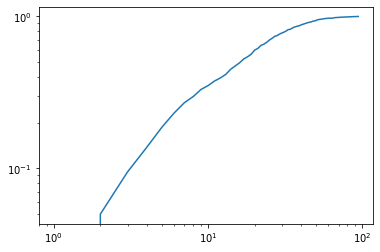

In [45]:
powerlaw.plot_cdf(nodes_degrees_list)

<AxesSubplot:>

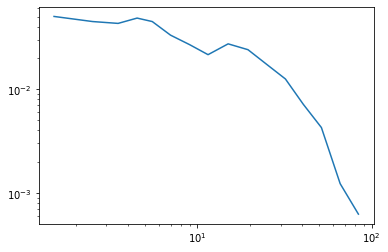

In [46]:
powerlaw.plot_pdf(nodes_degrees_list)

<AxesSubplot:>

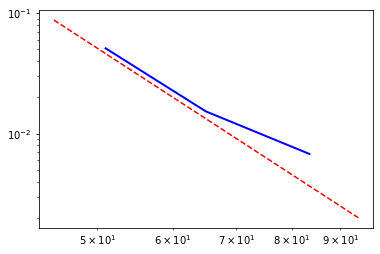

In [47]:
figCCDF = results.plot_pdf(color='b', linewidth=2)
results.power_law.plot_pdf(color='r', linestyle='--', ax=figCCDF)

In [23]:
print('powerlaw', stats.kstest(list(nodes_degrees.values()), "powerlaw", args = (alpha, xmin), N = len(nodes_degrees)))
print('lognorm', stats.kstest(list(nodes_degrees.values()), "lognorm", args = (np.mean(list(nodes_degrees.values())), np.std(list(nodes_degrees.values()))), N = len(nodes_degrees)))

powerlaw KstestResult(statistic=0.9425427872860636, pvalue=0.0)
lognorm KstestResult(statistic=0.6748166259168704, pvalue=0.0)


In [93]:
R, p = results.distribution_compare('power_law', 'lognormal')
# R, p = results.distribution_compare('power_law', 'power_law')

In [94]:
R, p

(-1.0755114556477632, 0.2924894712179553)

## Hyperedges distribution

In [24]:
results = powerlaw.Fit(hyperedges_degrees_list, discrete=True)
alpha = results.power_law.alpha
xmin = results.power_law.xmin

Calculating best minimal value for power law fit


In [25]:
alpha, xmin

(4.4790037027253735, 4.0)

In [29]:
print('powerlaw', stats.kstest(list(nodes_degrees.values()), "powerlaw", args = (alpha, xmin), N = len(nodes_degrees)))
print('lognorm', stats.kstest(list(nodes_degrees.values()), "lognorm", args = (np.mean(list(nodes_degrees.values())), np.std(list(nodes_degrees.values()))), N = len(nodes_degrees)))

powerlaw KstestResult(statistic=0.5562347188264058, pvalue=1.0819613380116322e-238)
lognorm KstestResult(statistic=0.6748166259168704, pvalue=0.0)


<AxesSubplot:>

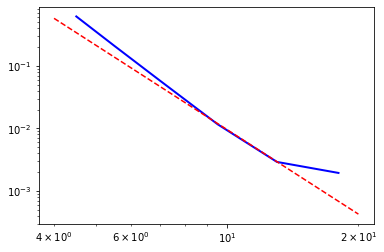

In [32]:
figCCDF = results.plot_pdf(color='b', linewidth=2)
results.power_law.plot_pdf(color='r', linestyle='--', ax=figCCDF)

<AxesSubplot:>

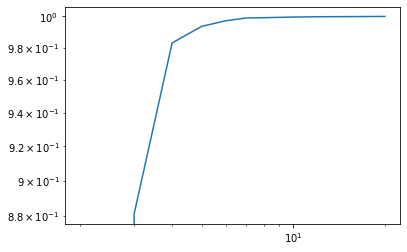

In [27]:
powerlaw.plot_cdf(hyperedges_degrees_list)

<AxesSubplot:>

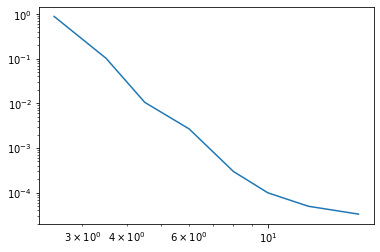

In [28]:
powerlaw.plot_pdf(hyperedges_degrees_list)

## Tests

In [23]:
data = list(range(1000))

In [33]:
results = powerlaw.Fit(data)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
sigma = results.power_law.sigma

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


In [25]:
alpha, xmin

(25.95159952660046, 923.0)

In [43]:
simulated_data = results.power_law.generate_random(10)

In [44]:
simulated_data.mean()

940.061711465963

In [45]:
simulated_data

array([942.40841149, 927.24568017, 950.82616483, 941.34496124,
       923.76371627, 941.30426534, 944.29985069, 960.41360502,
       937.17444606, 931.83601356])